# HOME TASK 4

### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


Загрузим базовые библиотеки

In [193]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

Загрузим "Boston House Prices dataset" и сформируем датасеты

In [194]:
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')

In [195]:
boston = load_boston()
data = boston["data"]
feature_names = boston["feature_names"]
target = boston["target"]

In [196]:
X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=["price"])

Разобьем датасеты на train и test

In [197]:
from sklearn.model_selection import train_test_split

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

Масштабируем данные

In [199]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [200]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

Применим TSNE

In [201]:
from sklearn.manifold import TSNE

In [202]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=100)

In [203]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(303, 13)
После:	(303, 2)


Построим диаграмму рассеяния

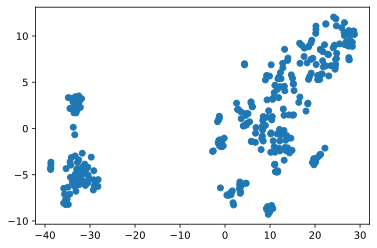

In [204]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.

In [205]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [206]:
labels_train = kmeans.fit_predict(X_train_scaled)

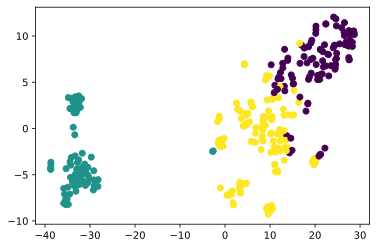

In [207]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

Вычислим средние значения price и CRIM в разных кластерах.

In [208]:
print(y_train.mean())
print(X_train['CRIM'].mean())

price    23.124092
dtype: float64
3.345161419141914


In [209]:
print(y_train[labels_train == 0].mean())
print(X_train.loc[labels_train == 0, 'CRIM'].mean())

price    27.512121
dtype: float64
0.08938686868686872


In [210]:
print(y_train[labels_train == 1].mean())
print(X_train.loc[labels_train == 1, 'CRIM'].mean())

price    16.25
dtype: float64
11.84023935897436


In [211]:
print(y_train[labels_train == 2].mean())
print(X_train.loc[labels_train == 2, 'CRIM'].mean())

price    23.931746
dtype: float64
0.644412222222222


### *Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


Масштабируем данные

In [212]:
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [213]:
# labels_test = kmeans.predict(X_test_scaled)
# X_test_tsne = tsne.fit_transform(X_test_scaled)
# plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)
# plt.show()

Вычислим средние значения price и CRIM в разных кластерах.

In [214]:
print(y_test.mean())
print(X_test['CRIM'].mean())

price    21.650246
dtype: float64
4.014083793103448


In [215]:
print(y_test[labels_test == 0].mean())
print(X_test.loc[labels_test == 0, 'CRIM'].mean())

price    26.525397
dtype: float64
0.10915015873015875


In [216]:
print(y_test[labels_test == 1].mean())
print(X_test.loc[labels_test == 1, 'CRIM'].mean())

price    16.301695
dtype: float64
12.905872542372881


In [217]:
print(y_test[labels_test == 2].mean())
print(X_test.loc[labels_test == 2, 'CRIM'].mean())

price    21.754321
dtype: float64
0.5745193827160492
